In [5]:
import numpy as np

In [ ]:
#Name-Tushar sabharwal
# Project- Linear Regression from Scratch 

In [6]:
class LinearRegressionScratch:
    def __init__(self,learning_rate=0.01,n_iteration=1000):
        self.learning_rate=learning_rate
        self.n_iteration= n_iteration
        self.slope = None
        self.intercept = None
        self.Previous_cost = []
    def fit(self,x,y):
        #x is in dataframe or 2d array form it is our input
        #y is in the series form it is our output(or target)
        x_sample,x_feature = x.shape
        #We will initialize slope and intercept with zero
        self.slope = np.zeros(x_feature)
        self.intercept = 0
      
        for i in range(self.n_iteration):
            #h(x) = mx + c
            #y_pred = mx + c
            y_pred= np.dot(x,self.slope)+ self.intercept
            #gradient descent
            #slope
            ds = (1/x_sample)*np.dot(x.T,(y_pred-y))
            #intercept
            di = (1/x_sample)*np.sum(y_pred-y)
            #updating the slope and intercept
            self.slope-=self.learning_rate*ds
            self.intercept -=self.learning_rate*di
            #calculating cost for each iteration
            cost = (1/2 * x_sample)*np.sum((y_pred-y)**2)
            #storing cost in list
            self.Previous_cost.append(cost)
    def predict(self,x):
        #x is in dataframe or 2d array form it is our input
        #returning the predicted value
        return np.dot(x,self.slope)+self.intercept

In [7]:
#importing necessary libraries for data analysis and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import make_regression
#creating a synthetic regression dataset
x,y = make_regression(n_samples=200,n_features=1,noise=20,random_state=42)


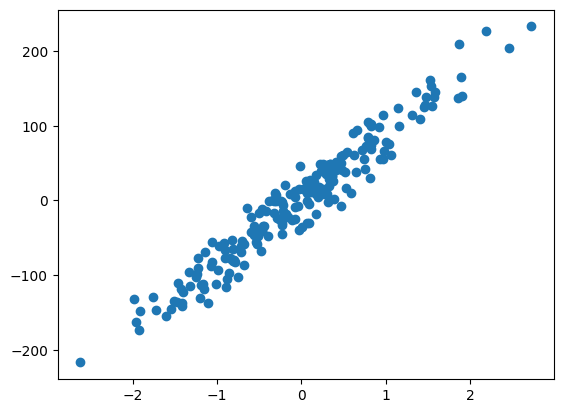

In [9]:
#visualizing the dataset
plt.scatter(x,y)

In [10]:
#splitiong the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.20,random_state=42)


In [11]:
#applying Sklearn's Linear Regression model for comparison
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression(n_jobs=-1)
sklearn_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [12]:
sklearn_model.coef_

array([86.51154198])

In [13]:
sklearn_model.intercept_

np.float64(2.4461021846792352)

In [20]:
#calculating mean squared error for sklearn model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,sklearn_model.predict(x_test))
mse

437.54985402070196

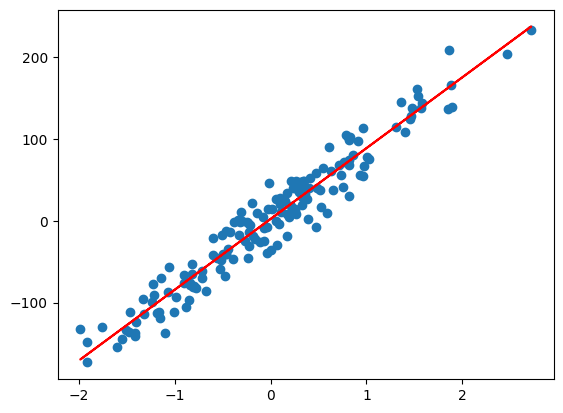

In [14]:
#plotting the regression line for sklearn model
plt.scatter(x_train,y_train)
plt.plot(x_train,sklearn_model.predict(x_train), color = "r")

In [ ]:
#applying our Linear Regression from scratch model
my_model = LinearRegressionScratch(learning_rate=0.01, n_iteration=1000)
my_model.fit(x_train,y_train)


In [ ]:
# my model predticted future values
my_predict=my_model.predict(x_test)

In [ ]:
#my model slope(or coef_)
my_model.slope

array([86.49180093])

In [ ]:
#my model mean squared error
mse1 = mean_squared_error(y_test,my_predict)
mse1

437.6332047320534

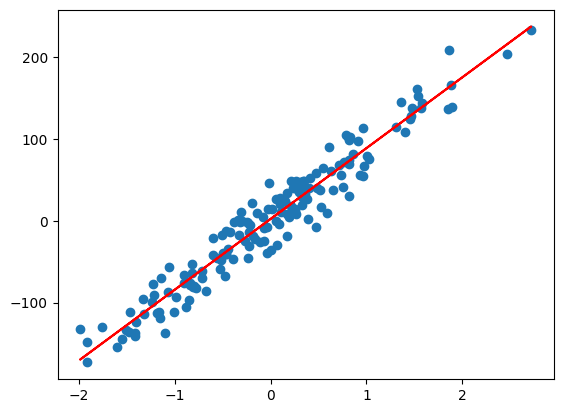

In [ ]:
#my model regression line
plt.scatter(x_train,y_train)
plt.plot(x_train,my_model.predict(x_train), color = "r")

In [23]:
#my model vs sklearn model
# Comparing the slope and intercept of both models
print("Sklearn Model Coefficient (slope): ", sklearn_model.coef_)
print("My Model Coefficient (slope): ", my_model.slope)
print("Sklearn Model Intercept: ", sklearn_model.intercept_)
print("My Model Intercept: ", my_model.intercept)


Sklearn Model Coefficient (slope):  [86.51154198]
My Model Coefficient (slope):  [86.49180093]
Sklearn Model Intercept:  2.4461021846792352
My Model Intercept:  2.445150715288754
